<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Predict" data-toc-modified-id="Predict-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Predict</a></span></li></ul></div>

# Using SVM for classification - Homework

## Imports

In [1]:
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We load five datasets from https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection <br>
These datasets contain spam and non-spam comments of 5 different popular youtube videos and we have 1956 of them

In [2]:
df1 = pd.read_csv('Youtube01-Psy.csv')
df2 = pd.read_csv('Youtube02-KatyPerry.csv')
df3 = pd.read_csv('Youtube03-LMFAO.csv')
df4 = pd.read_csv('Youtube04-Eminem.csv')
df5 = pd.read_csv('Youtube05-Shakira.csv')

In [3]:
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
df = df[['CONTENT', 'CLASS']].copy()

In [5]:
df.CLASS.value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

## Preprocessing

In [6]:
#lemma = WordNetLemmatizer()
#df.CONTENT = df.CONTENT.apply(lambda w : lemma.lemmatize(lemma.lemmatize(w.lower(), 'v'),'n'),'a')

We will use a TFIDF matrix to represent our features. Scikit Learn provides an implementation

In [7]:
vect = TfidfVectorizer(lowercase=True,stop_words='english')

In [8]:
tfidf_mat = vect.fit_transform(df.CONTENT)
feature_names = vect.get_feature_names()

In [9]:
dense = tfidf_mat.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df2, df.CLASS, test_size = 0.3)

## Training

In [68]:
parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
             'gamma': ['auto', 'scale']}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv=2)
clf.fit(X_train, y_train)
print(clf.best_params_)         

{'gamma': 'auto', 'kernel': 'linear'}


In [11]:
parameters = {'C': [0.1, 1, 10]}
svc = LinearSVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 1}


In [12]:
parameters = {'C': np.linspace(0.4,6,100)}
svc = LinearSVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 1.8707070707070708}


In [13]:
best_clf = clf.best_estimator_

## Predict

In [14]:
y_pred = best_clf.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       305
           1       0.96      0.95      0.95       282

   micro avg       0.96      0.96      0.96       587
   macro avg       0.96      0.96      0.96       587
weighted avg       0.96      0.96      0.96       587



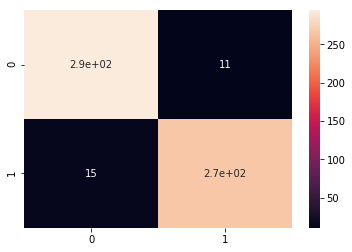

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()